# Hear Attack Analysis and Prediction Dataset

This dataset contains information about people and there chances of having a heart stroke.


 **Dataset Information:**





* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 
    * 0 = less chance of heart attack 
    * 1 = more chance of heart attack
    
    

**Objective:**




* With the dataset provided for heart analysis, we have to analyse the possibilities of heart attack on the basis of various features, and then the prediction from the analysis will tell us that whether an individual is prone to heart attack or not. 
* The detailed analysis can proceed with the exploratory data analysis (EDA). 
* The classification for predication can be done using various machine learning model algorithms, choose the best suited model for heart attack analysis and finally save the model in the pickle (.pkl) file.


**Questions to be answered:**





* Does the age of a person contribute towards heart attack?
* Are different types of chest pain related to each other or the possibility of getting a heart attack?
* Does high blood pressure increase the risk of heart attack?
* Does the choestrol level eventually contribute as a risk factor towards heart attack?



In [1]:
# Heart Attack Analysis and Prediction Dataset
# Date: April 26, 2021

In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb


In [3]:
#Reading the csv file heart.csv in variable 
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [4]:
# looking at the first 5 rows of our data
df.head(10)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.shape

(303, 14)

**Observation:**
 
 * Seems like all the columns are already in int or float data types.
 * If the columns were not in int or float ( i.e they were categorical variables), we would have had to convert them for model building.
 * Few ways to do so are by using pd.get_dummies, one hot encoding, multi collinearity, label encoder etc.

In [6]:
df.tail(25)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [7]:
print('Number of rows are',df.shape[0], 'and number of columns are ',df.shape[1])

Number of rows are 303 and number of columns are  14


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Observation:**

* There are no missing rows in the entire dataset.
* All the columns except oldpeak (float) are of int data type.

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Observation:** There are no missing values.

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [11]:
df.duplicated().sum()

1

**Observation:** There is 1 duplicate row. Let's drop it!

In [12]:
df.drop_duplicates(inplace=True)
print('Number of rows are',df.shape[0], 'and number of columns are ',df.shape[1])

Number of rows are 302 and number of columns are  14


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


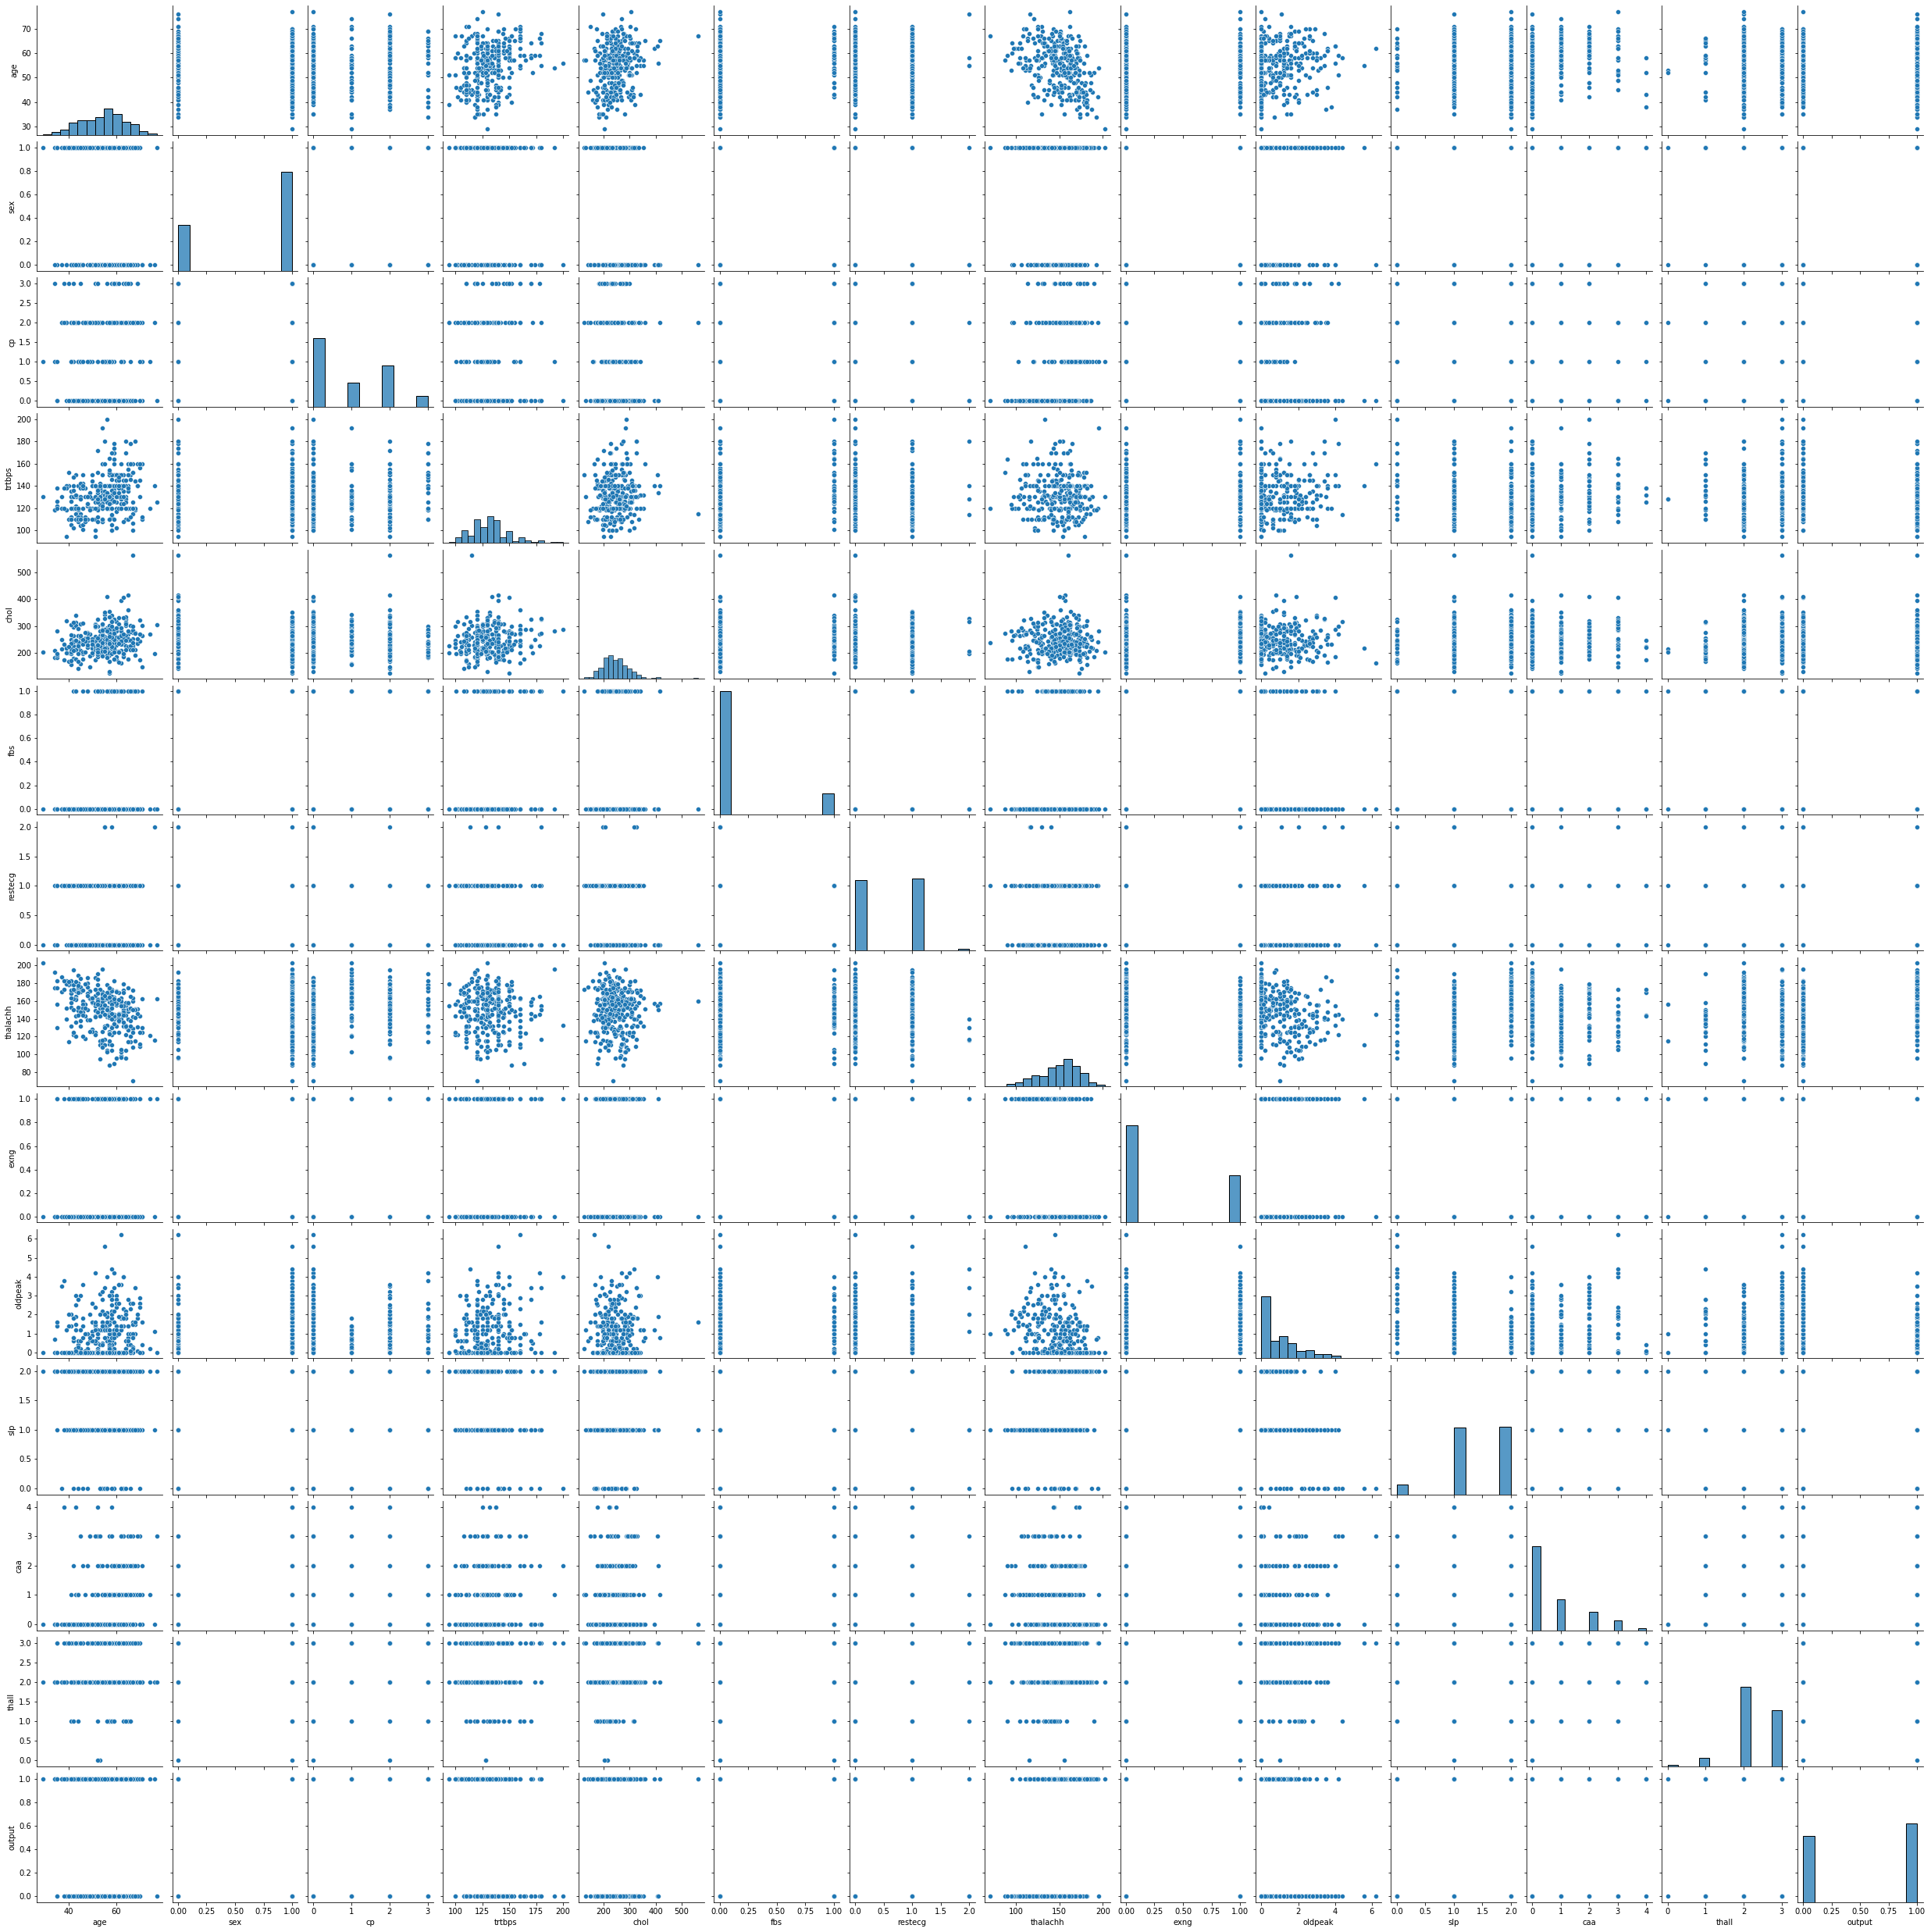

In [14]:
sns.pairplot(df)

**Observation:**

* The average blood pressure of an individual is 130 whereas the maximun value goes upto 200.
* The average heart rate of the group is 152, whereas overall it ranges between 133 to 202
* Age of the group varies from 29 to 77 and the mean age is 55.5

In [15]:
#This is to look at what all unique values have . Just trying to use python
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 


<AxesSubplot:xlabel='trtbps'>

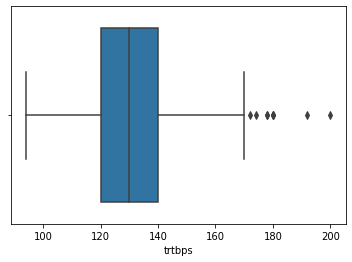

In [16]:
sns.boxplot(df['trtbps'])


**Observation:**

* There are two sex : 0 and 1
* The highest cholestrol level is 564 and the lowest is 126.
* Resting Blood Pressure of individuals vary between 94 to 200.
* There are 4 types of chest pain.
* exercise induced angina has 2 types (1 = yes; 0 = no)

<AxesSubplot:xlabel='chol'>

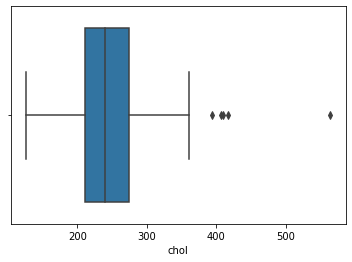

In [17]:
sns.boxplot(df['chol'])

<AxesSubplot:xlabel='thalachh'>

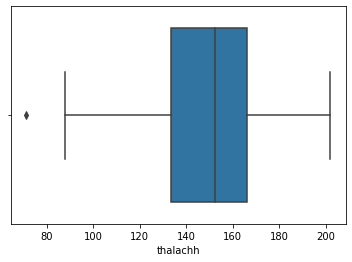

In [18]:
sns.boxplot(df['thalachh'])

<AxesSubplot:xlabel='oldpeak'>

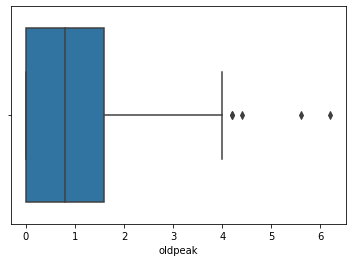

In [19]:
sns.boxplot(df['oldpeak'])

In [20]:
print(np.where(df['trtbps']>175))
print(np.where(df['chol']>380))
print(np.where(df['oldpeak']>4))
print(np.where(df['thalachh']<80))

(array([101, 110, 202, 222, 247, 259, 265]),)
(array([ 28,  85,  96, 219, 245]),)
(array([101, 203, 220, 249, 290]),)
(array([271]),)


In [21]:
df.drop(df.index[[101, 110, 202, 222, 247, 259, 265,28,85,  96, 219, 245,101, 203, 220, 249, 290,271]],inplace=True)

In [22]:
df.shape

(285, 14)

In [23]:
df.tail(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


Number of people having sex as 0 are 86 and Number of people having sex as 1 are 199


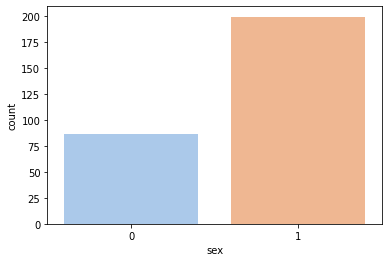

In [24]:
print(f'Number of people having sex as 0 are {df.sex.value_counts()[0]} and Number of people having sex as 1 are {df.sex.value_counts()[1]}')
p = sns.countplot(data=df, x="sex", palette='pastel')
plt.show()

**Observation:** 

* The number of people belonging to sex category 0 are 96 whereas 1 are 206.
* The number of people in one category are more than double than the zero.

<AxesSubplot:xlabel='cp', ylabel='count'>

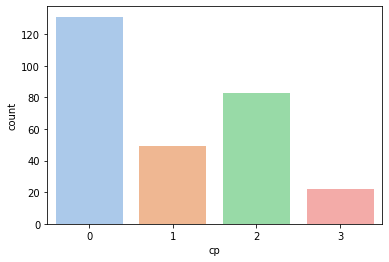

In [25]:
sns.countplot(x='cp', data=df, palette='pastel')

**Observation:**

* cp : Chest Pain type chest pain type

    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
    
* People of chest pain category '0' have the highest count, whereas of count of chest pain '3' is the lowest

<AxesSubplot:xlabel='fbs', ylabel='count'>

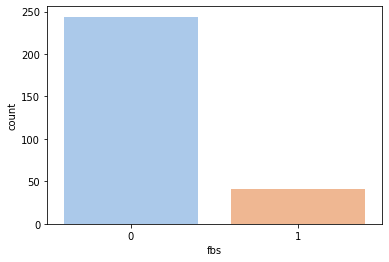

In [26]:
sns.countplot(x='fbs', data=df, palette='pastel')

**Observation:** People of fbs category 1 are less than 25% of people of fbs category 0.

<AxesSubplot:xlabel='thall', ylabel='count'>

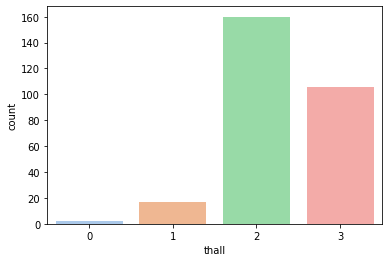

In [27]:
sns.countplot(x='thall', data=df, palette='pastel')

**Observation:** Thall count is maximum for type 2 ( 165 ) and min for type 0 ( 2 ) .


<AxesSubplot:xlabel='restecg', ylabel='count'>

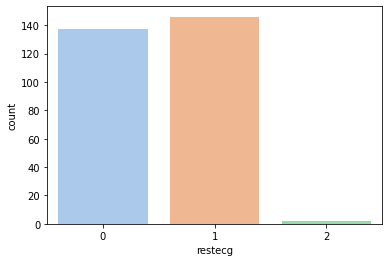

In [28]:
sns.countplot(x='restecg', data=df, palette='pastel')

**Observation:** 

* ECG count is almost the same for type 0 and 1. 
* Also, its almost negligible for type 2 in comparision to type 0 and 1.

<AxesSubplot:xlabel='caa', ylabel='age'>

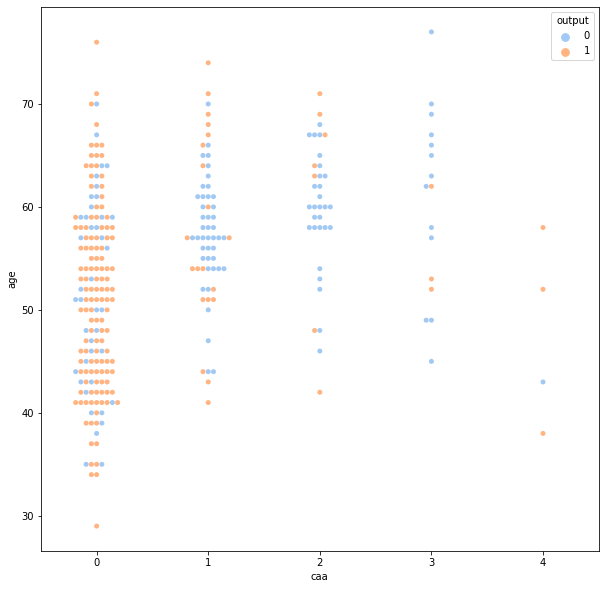

In [29]:
plt.figure(figsize = (10,10))
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='pastel')

**Observation:**

* This swarmplot gives us a lot of information.
* Accoring to the figure, people belonging to caa category '0' , irrespective of their age are highly prone to getting a heart attack.
* While there are very few people belonging to caa category '4' , but it seems that around 75% of those get heart attacks.
* People belonging to category '1' , '2' and '3' are more or less at similar risk.

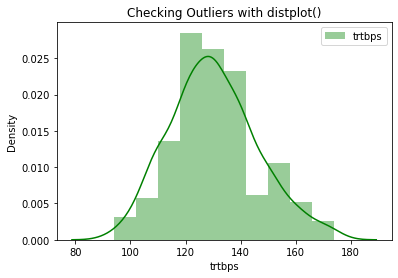

In [30]:
sns.color_palette("pastel")
plt.title('Checking Outliers with distplot()')
sns.distplot(df.trtbps, label='trtbps', kde=True, bins=10, color='green')
plt.legend()

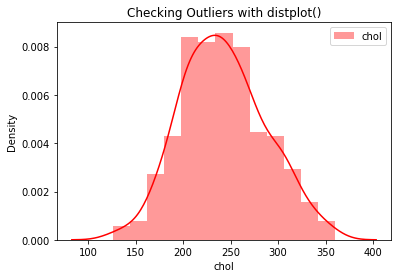

In [31]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df.chol, label='chol', kde=True, color='red')
plt.legend()

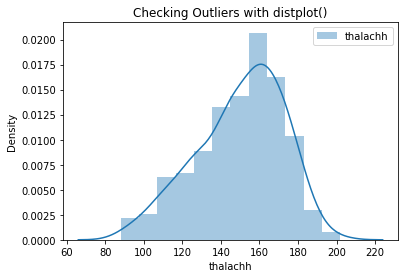

In [32]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df['thalachh'],label='thalachh', kde=True )
plt.legend()

**Observations:**

* trtbps and chol looks like they are normally distributed, with some outliers highly skewed towards right.
* In case of thalachh the data is highly skewed towards right!

<AxesSubplot:xlabel='age', ylabel='oldpeak'>

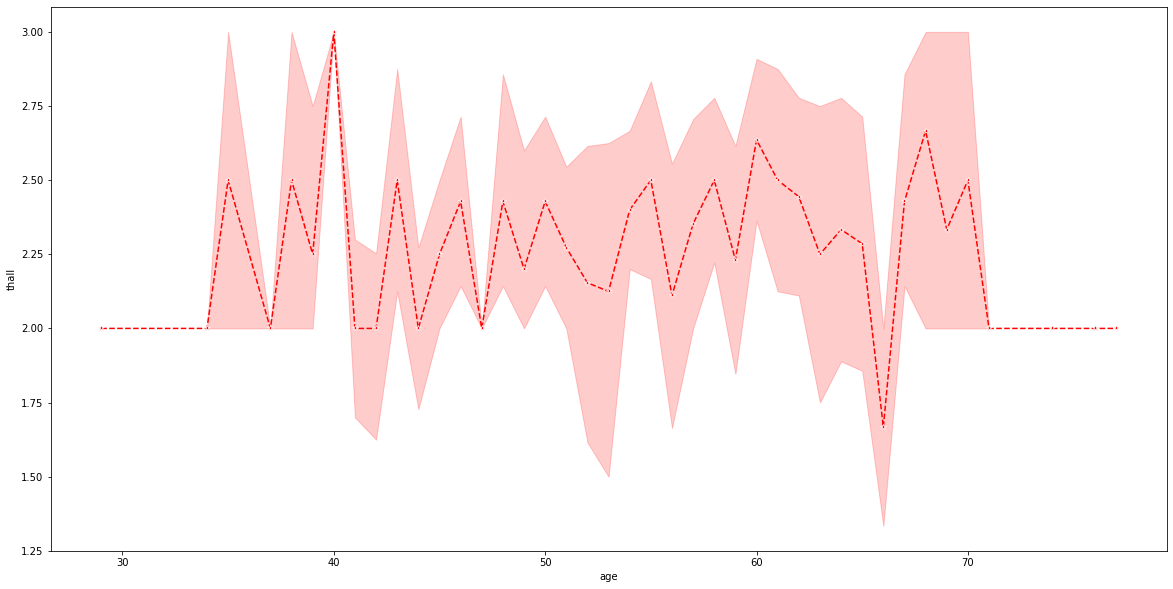

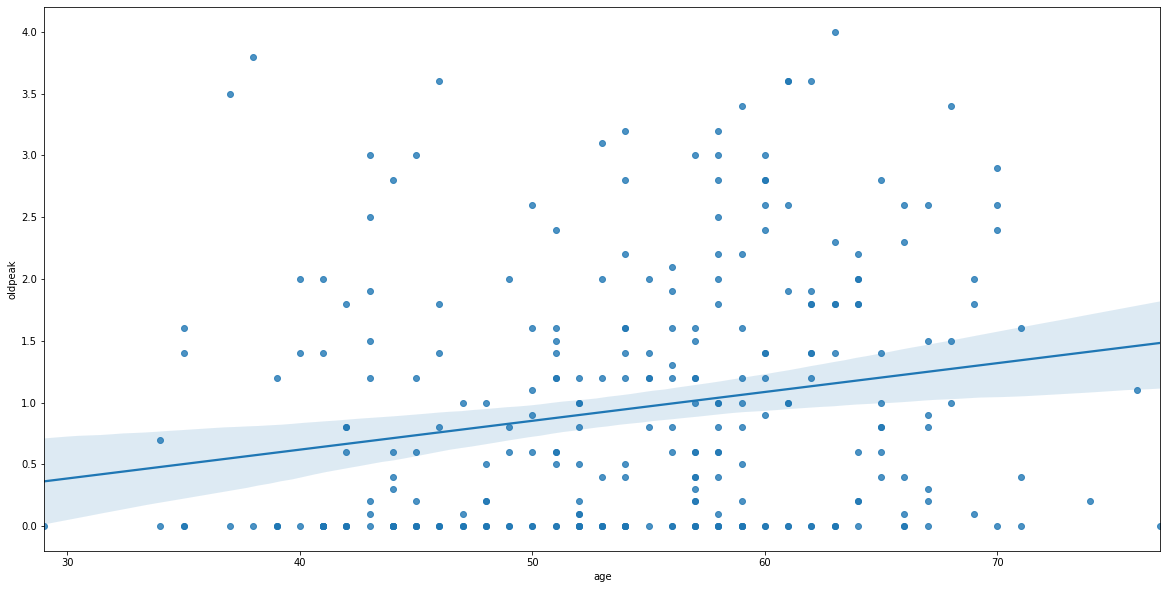

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(x = df['age'], y = df['thall'],marker = '*', linestyle = '--', color = 'red')

plt.figure(figsize = (20,10))
sns.regplot(x=df['age'],y=df['oldpeak'])

**Observation:** 

* This hardly provides any information. 
* The relationship between age-oldpeak and age-thall is highly uncertain and varies significantly.

In [34]:
X = df.drop('output', axis = 1)
y = df['output']

**About StandardScaler:**

* Python sklearn library offers us with StandardScaler() function to standardize the data values into a standard format.

* Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

* StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

In [35]:
df.reset_index(drop=True, inplace=True)

In [36]:
columns_to_scale = df.iloc[:,[0,3,4,7,9,]]
columns_to_scale

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
280,57,140,241,123,0.2
281,45,110,264,132,1.2
282,68,144,193,141,3.4
283,57,130,131,115,1.2


In [37]:
# Spliting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ss = StandardScaler()
scaled_values = ss.fit_transform(columns_to_scale)
scaled_values = pd.DataFrame(scaled_values, columns=columns_to_scale.columns)
scaled_values


,age,trtbps,chol,thalachh,oldpeak
0,0.984018,0.942112,-0.206453,0.000932,1.322720
1,-1.877667,-0.011827,0.175619,1.639050,2.495880
2,-1.437408,-0.011827,-0.858224,0.974948,0.442851
3,0.213564,-0.647786,-0.139029,1.240589,-0.143729
4,0.323629,-0.647786,2.513005,0.576487,-0.339256
...,...,...,...,...,...
280,0.323629,0.624132,-0.026654,-1.194451,-0.730309
281,-0.997149,-1.283745,0.490267,-0.795990,0.247324
282,1.534342,0.878516,-1.105448,-0.397529,2.398117
283,0.323629,-0.011827,-2.498889,-1.548639,0.247324


In [38]:
scaled_df = pd.concat([scaled_values,df.iloc[:,[1,2,5,6,8,10,11,12,13]]],axis=1)
scaled_df

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.984018,0.942112,-0.206453,0.000932,1.322720,1,3,1,0,0,0,0,1,1
1,-1.877667,-0.011827,0.175619,1.639050,2.495880,1,2,0,1,0,0,0,2,1
2,-1.437408,-0.011827,-0.858224,0.974948,0.442851,0,1,0,0,0,2,0,2,1
3,0.213564,-0.647786,-0.139029,1.240589,-0.143729,1,1,0,1,0,2,0,2,1
4,0.323629,-0.647786,2.513005,0.576487,-0.339256,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.323629,0.624132,-0.026654,-1.194451,-0.730309,0,0,0,1,1,1,0,3,0
281,-0.997149,-1.283745,0.490267,-0.795990,0.247324,1,3,0,1,0,1,0,3,0
282,1.534342,0.878516,-1.105448,-0.397529,2.398117,1,0,1,1,0,1,2,3,0
283,0.323629,-0.011827,-2.498889,-1.548639,0.247324,1,0,0,1,1,1,1,3,0


In [39]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(random_state=9), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), xgb.XGBClassifier()]
models = dict(zip(key,value))

In [40]:
predicted =[]

In [41]:
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8771929824561403
KNeighborsClassifier 0.5964912280701754
SVC 0.6842105263157895
DecisionTreeClassifier 0.7894736842105263
RandomForestClassifier 0.8245614035087719
GradientBoostingClassifier 0.8245614035087719
AdaBoostClassifier 0.9473684210526315
[03:39:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.8421052631578947


<AxesSubplot:>

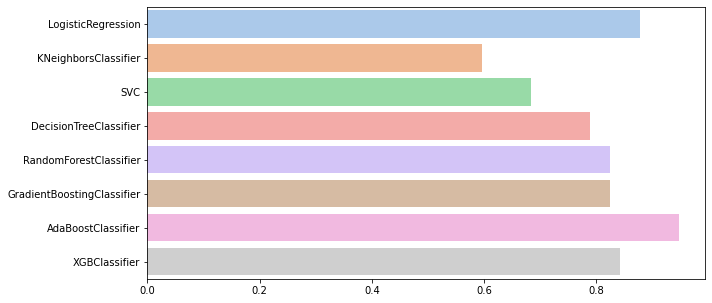

In [42]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette='pastel')

**Observation:**  From the above figure we can see that none of the above models give an accuracy greater than 90%. Let us try some other approach. Lets take some other random_state for Logistic Regression Model and see if the accuracy improves!

In [43]:
lr = AdaBoostClassifier(n_estimators=100, random_state=0)
rs = []
acc = []
for i in range(1,100,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)    
    model_lr_rs = lr.fit(X_train, y_train.values.ravel())
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

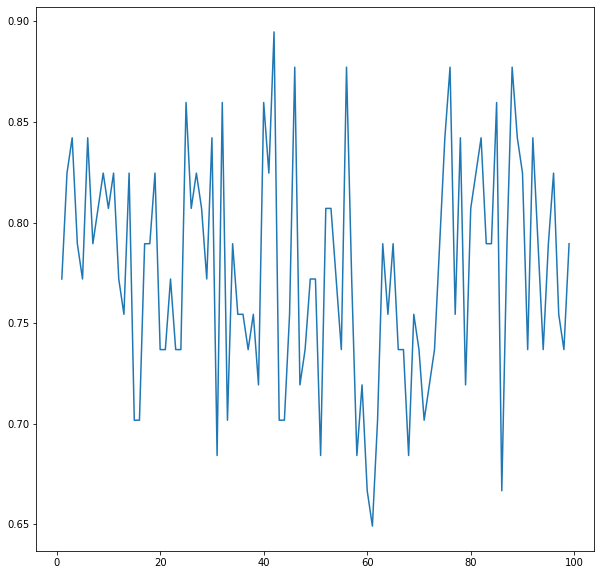

In [44]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc)

In [45]:
for i in range(len(rs)):
    print(rs[i],acc[i])

1 0.7719298245614035
2 0.8245614035087719
3 0.8421052631578947
4 0.7894736842105263
5 0.7719298245614035
6 0.8421052631578947
7 0.7894736842105263
8 0.8070175438596491
9 0.8245614035087719
10 0.8070175438596491
11 0.8245614035087719
12 0.7719298245614035
13 0.7543859649122807
14 0.8245614035087719
15 0.7017543859649122
16 0.7017543859649122
17 0.7894736842105263
18 0.7894736842105263
19 0.8245614035087719
20 0.7368421052631579
21 0.7368421052631579
22 0.7719298245614035
23 0.7368421052631579
24 0.7368421052631579
25 0.8596491228070176
26 0.8070175438596491
27 0.8245614035087719
28 0.8070175438596491
29 0.7719298245614035
30 0.8421052631578947
31 0.6842105263157895
32 0.8596491228070176
33 0.7017543859649122
34 0.7894736842105263
35 0.7543859649122807
36 0.7543859649122807
37 0.7368421052631579
38 0.7543859649122807
39 0.7192982456140351
40 0.8596491228070176
41 0.8245614035087719
42 0.8947368421052632
43 0.7017543859649122
44 0.7017543859649122
45 0.7543859649122807
46 0.87719298245614

# Conclusion: 


* High Blood Pressure, High Cholestrol and High Heart Rate leads to high chance of heart attack.

* In the count of target showed up that we have more chance of heart attack details.

* Age from 40-60 years have the high chance of heart attack.

* Male gender has more chance of heart attack compared to female ones.

* Highly Correlated factors in this dataset are :
    * Age and trtbps (blood pressure rate)
    * Age and chol (cholestrol level)